# Prediction of Heart Attack using multiple Maching Learnning Models

Ischemia(Heart Attack) results when the heart muscle is starved for oxygen and nutrients. When damage or death of part of the heart muscle occures as a result of ischemia, its called a heart attack, or myocardial infarction (MI).



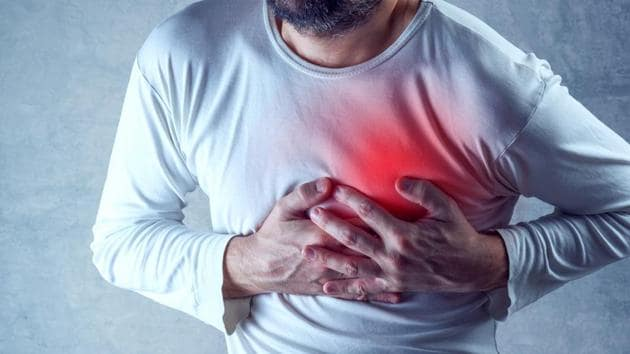



About 1 in 5 people who have had a heart attack will be readmitted to the hospital for a second one within five years, according to the American Heart Association. 

Coronary heart disease is the most common type of heart disease, killing 365,914 people in 2017. About 18.2 million adults age 20 and older have CAD (about 6.7%). About 2 in 10 deaths from CAD happen in adults less than 65 years old.

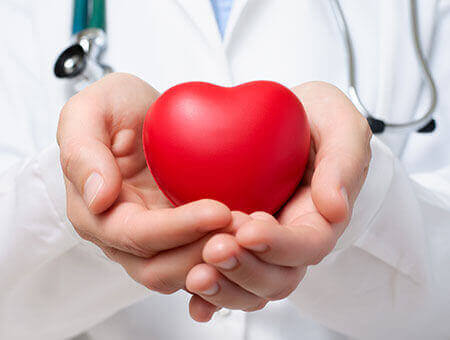


Heart disease refers to a variety of conditions that affect the heart — from infections to genetic defects and blood-vessel diseases.

Most heart disease can be prevented with healthy lifestyle choices, yet it’s still the number one health threat in the world.





What are the risk factors?
Having even one risk factor increases your odds of getting heart disease. About half of all adultsTrusted Source have at least one of three major risk factors: high blood pressure, high cholesterol, or smoking.

These are some of the more common heart disease risks:

High blood pressure. High blood pressure, or hypertension, has long been recognized as a major risk factor for cardiovascular disease.
High cholesterol. Extra cholesterol can build up on artery walls and reduce blood flow to the heart.
Diabetes. Adults with diabetes are two to four times more likely to die from heart disease as people who don’t have it.
Depression. Adults with a depressive disorder or symptoms of depression have a 64 percentTrusted Source greater risk of developing coronary artery disease.
Obesity. Being overweight or obese is linked to several factors that increase the risk for cardiovascular disease, including diabetes and high blood pressure.
Certain behaviors also put you at risk for heart disease. These include:

Smoking. Smoking is a major cause of cardiovascular disease and causes approximately 1 in 4Trusted Source heart disease deaths.
Eating a poor diet. A diet that’s high in fat, salt, sugar, and cholesterol can contribute to the development of heart disease.
Not exercising. Even though exercise reduces the risk for heart disease and early death, only about half of Americans get the recommended amount of aerobic activity.
Drinking alcohol excessively. Heavy alcohol use can increase the risk for heart attack, heart failure, and death. Excess drinking can damage the heart before symptoms even appear.

# Table of Contents

## 1) Importing Required Packages

## 2) Exploratory Data Analysis

## 3) Preparing Maching Learning Models

## 4) Models Evaluation

## 5) Ensembling

## 6) Conclusion






# Imporing Libraries

In [1]:
#Loading Data set
import pandas as pd
import numpy as np

#Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Exploratory Data Analysis
from collections import Counter
import sys
import pandas_profiling as pp

# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Data splitting
from sklearn.model_selection import train_test_split

# Data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Ensembling
from mlxtend.classifier import StackingCVClassifier

# Loading the dataset

In [2]:
data = pd.read_csv("C:\\Users\\SHASHI\\OneDrive\\Desktop\\Python\\heart.csv")

In [3]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Dimention of the data

In [4]:
data.shape

(303, 14)

# Describe the summary of Dataset

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Finding the data types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Finding the missing values

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Exploratory Data Analysis

In [8]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data has no missing values or any nuance variables. Data is ready for Model Building

In [9]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Lets check whether data got split equally or not.

In [10]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 131, 0: 111})

In [11]:
train_test_split(data.head(3))

[   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 
    ca  thal  target  
 1   0     2       1  
 0   0     1       1  ,
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 
    ca  thal  target  
 2   0     2       1  ]

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Types of Models

1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifier
4. Extreme Gradient Boost
5. K-Nearest Neighbour
6. Decesion Tree
7. Support Vector Machine

# 1. Logistic Regression

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
cm = confusion_matrix(y_test, lr_predict)
lr_accuracy = accuracy_score(y_test, lr_predict)

print("Confusion Matrix")
print(cm)
print("\n")
print("Accuracy of Logistic Regression:", lr_accuracy*100)
print("\n")
print(classification_report(y_test, lr_predict, ))

Confusion Matrix
[[21  6]
 [ 3 31]]


Accuracy of Logistic Regression: 85.24590163934425


              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



# 2. Naive Bayes

In [23]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predict = nb.predict(X_test)
cm = confusion_matrix(y_test, nb_predict)
nb_accuracy = accuracy_score(y_test, nb_predict)

print("Confusion Matrix")
print(cm)
print("\n")
print("Accuracy of Naive Bayes Model:", nb_accuracy*100)
print("\n")
print(classification_report(y_test, nb_predict))

Confusion Matrix
[[21  6]
 [ 3 31]]


Accuracy of Naive Bayes Model: 85.24590163934425


              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



# 3. Random Forest

In [24]:
rf = RandomForestClassifier(n_estimators=100, random_state=12, max_depth=5)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
cm = confusion_matrix(y_test, rf_predict)
rf_accuracy = accuracy_score(y_test, rf_predict)

print("Confusion Matrix")
print(cm)
print("\n")
print("Accuracy of Random Forest Model:", rf_accuracy*100)
print("\n")
print(classification_report(y_test, rf_predict))

Confusion Matrix
[[22  5]
 [ 3 31]]


Accuracy of Random Forest Model: 86.88524590163934


              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



# 4. Extreme Gradient Boost

In [41]:
xgb = XGBClassifier(learning_rate=0.001, n_estimators=150, max_depth=15, gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)
cm = confusion_matrix(y_test, xgb_predict)
xgb_accuracy = accuracy_score(y_test, xgb_predict)


print("Confusion Matrix")
print(cm)
print("\n")
print("Accuracy of Extreme Gradient Boost Model:", xgb_accuracy*100)
print("\n")
print(classification_report(y_test, xgb_predict))

C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:10:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix
[[23  4]
 [ 2 32]]


Accuracy of Extreme Gradient Boost Model: 90.1639344262295


              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


# 5. K-NeighborsClassifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predict)
knn_accuracy = accuracy_score(y_test, knn_predict)


print("Confusion Matrix")
print(cm)
print("\n")
print("Accuracy of KNeighborsClassifier Model:", knn_accuracy*100)
print("\n")
print(classification_report(y_test, knn_predict))

Confusion Matrix
[[24  3]
 [ 4 30]]


Accuracy of KNeighborsClassifier Model: 88.52459016393442


              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



# 6. Decision Tree Classifier

In [43]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=6)
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)
cm = confusion_matrix(y_test, dt_predict)
dt_accuracy = accuracy_score(y_test, dt_predict)


print("Confusion Matrix")
print(cm)
print("\n")
print("Accuracy of Decision Tree Classifier Model:", dt_accuracy*100)
print("\n")
print(classification_report(y_test, dt_predict))

Confusion Matrix
[[23  4]
 [ 7 27]]


Accuracy of Decision Tree Classifier Model: 81.9672131147541


              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



# 7. Support Vector Classifier

In [44]:
svc = SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
cm = confusion_matrix(y_test, svc_predict)
svc_accuracy = accuracy_score(y_test, svc_predict)

print("Confusion Matrix")
print(cm)
print("\n")
print("Accuracy of Support Vector Classifier Model:", svc_accuracy*100)
print("\n")
print(classification_report(y_test, svc_predict))

Confusion Matrix
[[23  4]
 [ 3 31]]


Accuracy of Support Vector Classifier Model: 88.52459016393442


              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



# Graph - BAR PLOT

<ipython-input-45-4b43488ce6b1>:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')


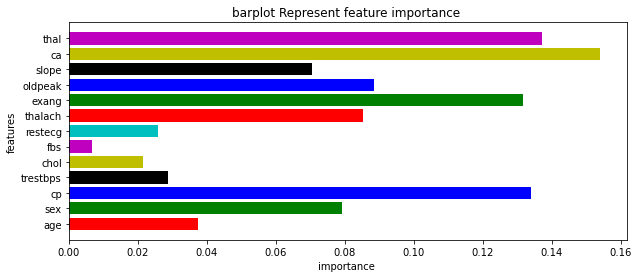

In [45]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

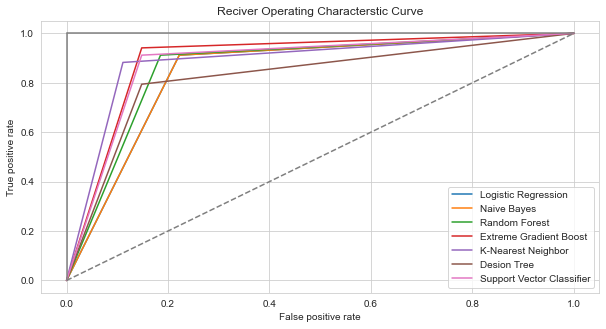

In [46]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nb_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predict)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predict)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predict)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predict)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# Model Evaluation

In [47]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_accuracy*100, nb_accuracy*100,rf_accuracy*100,xgb_accuracy*100,knn_accuracy*100,dt_accuracy*100,svc_accuracy*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,85.245902
1,Naive Bayes,85.245902
2,Random Forest,86.885246
3,Extreme Gradient Boost,90.163934
4,K-Nearest Neighbour,88.524590
5,Decision Tree,81.967213
6,Support Vector Machine,88.524590


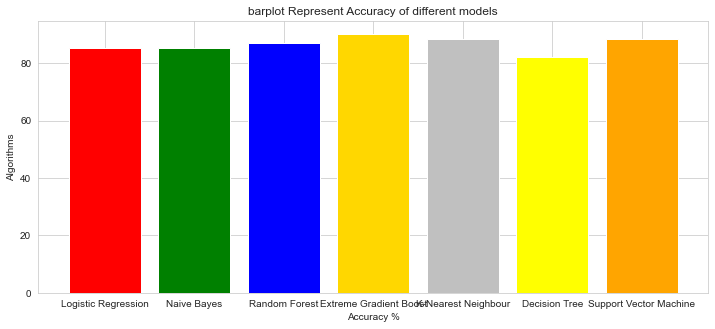

In [48]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# ENSEMBLING

In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.

In [51]:
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=1)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)


print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:15:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:15:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:15:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confussion matrix
[[25  2]
 [ 2 32]]


Accuracy of StackingCVClassifier: 93.44262295081968 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.94      0.94      0.94        34

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



C:\Users\SHASHI\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


# CONCLUSION

1. Extreme Gradient Boost gives the best Accuracy compared to other models.
2. Ensembling technique increase the accuracy of the model.
3. Exercise induced chest pain is major sympto0ms of heart attack.